<a href="https://colab.research.google.com/github/royalle-h/royalle-h/blob/main/Final_Project_TECH07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Idea for this project is showing a relationship between first generation students GPA, and the amount of sleep they obtain per night. Showing how sleep impacts GPA in students to show importance of sleep on academic performance.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# importing dataset

sleep_data = pd.read_csv("/content/drive/MyDrive/cmu-sleep.csv")

#sleep_data = dataset name
#cum_gpa = cumulative gpa
#TotalSleepTime = total sleep time
#demo_firstgen = First gen students


In [ ]:
sleep_data

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,daytime_sleep,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ
0,185,5,lac1,1,1,0,0.116727,432.200000,458.660000,0.862069,24.160000,3.000000,3.380000,73,4.055294859
1,158,5,lac1,0,1,0,0.141681,391.931035,364.465517,1.000000,13.137931,3.660000,2.600000,64,2.482534122
2,209,5,lac1,1,1,0,1.529289,344.304348,560.891304,0.793103,14.956522,3.570000,3.070000,63,2.30778293
3,102,5,lac1,0,1,1,0.130148,392.620690,416.482759,1.000000,54.551724,3.610000,3.560000,61,1.958280544
4,174,5,lac1,1,1,0,0.130181,423.421053,368.763158,0.655172,10.526316,3.210000,4.000000,61,1.958280544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,99978,4,nh,0,0,0,0.091325,383.448276,407.931035,0.966667,44.344828,3.722167,3.611333,,
630,61,2,uw1,0,1,,0.045369,477.894737,331.315789,0.678571,23.631579,3.868182,3.650000,10,-1.80457982
631,172,2,uw1,1,1,,0.075429,407.153846,387.269231,0.928571,12.384615,3.727272,3.600000,15,0.373361342
632,110,2,uw1,1,0,,0.200289,397.125000,487.583333,0.857143,99.541667,3.337500,3.538461,13,-0.497815123


In [7]:
sleep_data_df = sleep_data[['cum_gpa', 'TotalSleepTime', 'demo_firstgen']] # taking certain columns to create variable to make a new dataframe
sleep_data_df = pd.DataFrame(sleep_data_df) # create new dataframe with only the selected columns
sleep_data_df = sleep_data_df.dropna() #remove na values in dataset

# create dataframe for first gen students
sleep_data_firstgen = sleep_data_df[(sleep_data_df['demo_firstgen'] != '0') & (sleep_data_df['demo_firstgen'] !='2') & (sleep_data_df['demo_firstgen'] != ' ')] # remove any rows where a student is not a first gen, or other anomaly in data
print(sleep_data_firstgen)

# create dataframe for non first gen students
sleep_data_nonfirstgen = sleep_data_df[(sleep_data_df['demo_firstgen'] == '0') | (sleep_data_df['demo_firstgen'] == '2') | (sleep_data_df['demo_firstgen'] != ' ')] #
print(sleep_data_nonfirstgen)

      cum_gpa  TotalSleepTime demo_firstgen
3    3.610000      392.620690             1
14   3.160000      360.000000             1
15   3.000000      366.758621             1
19   3.100000      439.551724             1
59   3.400000      359.500000             1
..        ...             ...           ...
218  2.800200      273.916667             1
219  3.333400      356.833333             1
220  3.722167      384.200000             1
221  3.666600      327.518519             1
222  3.055667      275.846154             1

[103 rows x 3 columns]
      cum_gpa  TotalSleepTime demo_firstgen
0    3.000000      432.200000             0
1    3.660000      391.931035             0
2    3.570000      344.304348             0
3    3.610000      392.620690             1
4    3.210000      423.421053             0
..        ...             ...           ...
625  3.611167      318.125000             0
626  3.389000      360.760000             0
627  3.833500      427.551724             0
628  3.3

In [8]:
import statsmodels.formula.api as smf
# formula for linear regression model to view potential correlation between first gen students sleep time and gpa
formula = 'cum_gpa ~ TotalSleepTime'
# Fit the linear regression model
model = smf.ols(formula, data=sleep_data_firstgen).fit()
# Print the model summary
print(model.summary())



# formula for linear regression model to view potential correlation between non first gen students sleep time and gpa
fomula_non = 'cum_gpa ~ TotalSleepTime'
# linear regression model
model_non = smf.ols(fomula_non, data=sleep_data_nonfirstgen).fit()
# print model summary
print(model_non.summary())


                            OLS Regression Results                            
Dep. Variable:                cum_gpa   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.142
Date:                Sat, 31 May 2025   Prob (F-statistic):              0.146
Time:                        22:29:59   Log-Likelihood:                -60.260
No. Observations:                 103   AIC:                             124.5
Df Residuals:                     101   BIC:                             129.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.8044      0.338      8.

# Based off of this regression results, it looks to be that the p value of less than 0.05 shows a significance in students who are non-first gen and those who are first gen in how sleep affects cumulative gpa. Higher sleep shows to equal to a higher GPA for students who are not first generation, however for first generation students, it does not seem to be significant.


In [9]:
## Visualizations of data

import altair as alt
# Create a histogram of 'TotalSleepTime' faceted by 'cum_gpa' for first generation students
chart_firstgen = alt.Chart(sleep_data_firstgen).mark_bar().encode(
    # Use 'TotalSleepTime' on the x-axis with binning for the histogram bars
    x=alt.X('cum_gpa', bin=False),
    # Use the count of occurrences for each bin on the y-axis
    y='TotalSleepTime',
)
# Display the chart
chart_firstgen



import altair as alt

# Create a scatter plot of TotalSleepTime and cum_gpa for first generation students
chart_first_scatter = alt.Chart(sleep_data_firstgen).mark_point().encode(
    x='TotalSleepTime',
    y='cum_gpa',
    color = 'demo_firstgen'
)

# Display the chart
chart_first_scatter




# create histogram of 'TotalSleepTime' faceted by 'cum_gpa' for non first generation students
chart_non = alt.Chart(sleep_data_nonfirstgen).mark_bar().encode(
    # Use 'TotalSleepTime' on the x-axis with binning for the histogram bars
    x=alt.X('TotalSleepTime', bin=True),
    # Use the count of occurrences for each bin on the y-axis
    y='cum_gpa',
)
# Display the chart
chart_non

# Create a scatter plot of cum_gpa vs TotalSleepTime for non first generation students
scatter_plot_non = alt.Chart(sleep_data_df).mark_point().encode(
    x='TotalSleepTime',
    y='cum_gpa',
    color='demo_firstgen',  # Color points by demo_firstgen
    tooltip=['cum_gpa', 'TotalSleepTime', 'demo_firstgen']  # Add tooltips
).properties(
    title='GPA vs. Total Sleep Time by First Generation Status'
)

# Display the chart
scatter_plot_non

alt.Chart(...)

In [10]:
from scipy.stats import ttest_ind # unsure about using ttest for this


# t, p = ttest_ind(sleep_data_firstgen, sleep_data_nonfirstgen)

group by first gen and then
also add in the means of sleep between first gen and non first gen as well as the mean gpa between the two



In [11]:

# mean of the columns of cum_gpa and TotalSleepTime for non first generation students
column_means_skipna = sleep_data_nonfirstgen.mean(numeric_only=True, skipna=True)
print(column_means_skipna)

# mean of the columns of cum_gpa and TotalSleepTime for first generation students
column_means_skipna_firstgen = sleep_data_firstgen.mean(numeric_only=True, skipna=True)
print(column_means_skipna_firstgen)


# creating new data frame for the means
data_means = {'cum_gpa_firstgen': column_means_skipna_firstgen['cum_gpa'], 'TotalSleepTime_firstgen': column_means_skipna_firstgen['TotalSleepTime'], 'cum_gpa_nonfirstgen': column_means_skipna['cum_gpa'], 'TotalSleepTime_nonfirstgen': column_means_skipna["TotalSleepTime"]}
data_means = pd.DataFrame(data_means, index=[1,])
print(data_means)



#import seaborn as sns
#sns.barplot(x= data_means['cum_gpa_firstgen'],y=data_means['TotalSleepTime_firstgen'],hue = sleep_data['demo_firstgen'])

cum_gpa             3.465043
TotalSleepTime    397.291263
dtype: float64
cum_gpa             3.294928
TotalSleepTime    398.730842
dtype: float64
   cum_gpa_firstgen  TotalSleepTime_firstgen  cum_gpa_nonfirstgen  \
1          3.294928               398.730842             3.465043   

   TotalSleepTime_nonfirstgen  
1                  397.291263  


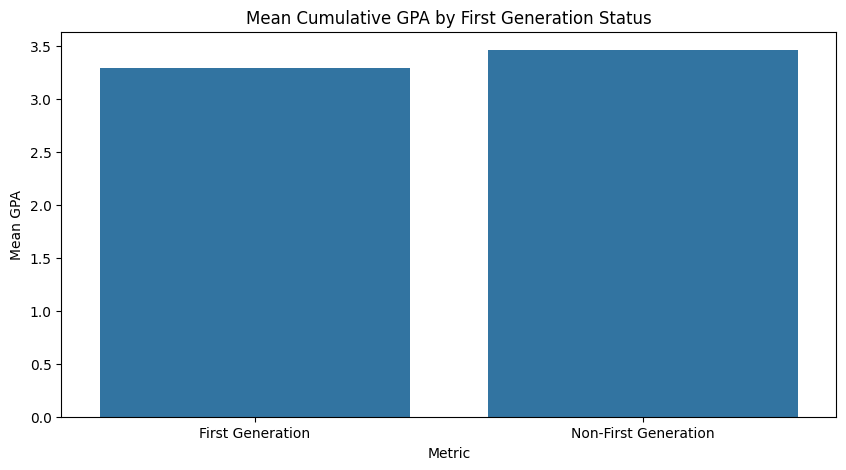

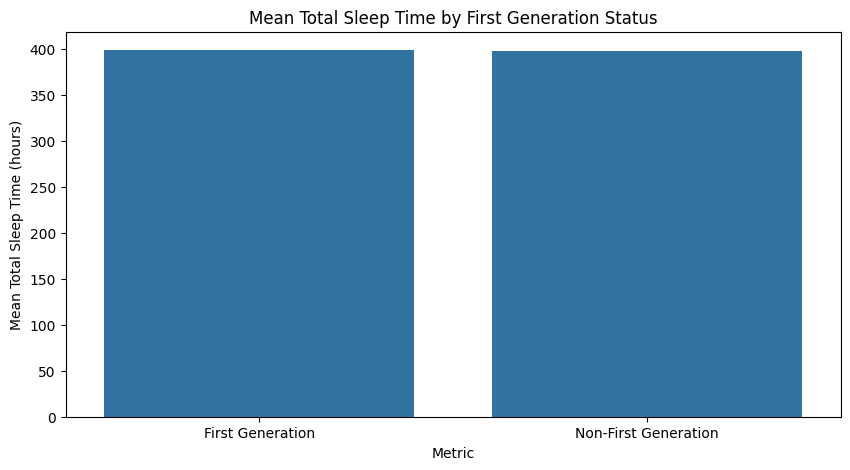

In [12]:
# prompt: plot data_means to show two different plots to show the two different variables

# Melt the DataFrame to long format for easier plotting
data_means_melted = data_means.melt(var_name='Metric', value_name='Value')

# Separate the data for the two plots
gpa_means = data_means_melted[data_means_melted['Metric'].str.contains('cum_gpa')]
sleep_means = data_means_melted[data_means_melted['Metric'].str.contains('TotalSleepTime')]

# Create the bar plot for GPA means
plt.figure(figsize=(10, 5))
sns.barplot(x='Metric', y='Value', data=gpa_means)
plt.title('Mean Cumulative GPA by First Generation Status')
plt.xlabel('Metric')
plt.ylabel('Mean GPA')
plt.xticks(ticks=[0, 1], labels=['First Generation', 'Non-First Generation'])
plt.show()

# Create the bar plot for Total Sleep Time means
plt.figure(figsize=(10, 5))
sns.barplot(x='Metric', y='Value', data=sleep_means)
plt.title('Mean Total Sleep Time by First Generation Status')
plt.xlabel('Metric')
plt.ylabel('Mean Total Sleep Time (hours)')
plt.xticks(ticks=[0, 1], labels=['First Generation', 'Non-First Generation'])
plt.show()


In [13]:
# prompt: Using dataframe sleep_data_df: create a dashboard using columns "cum_gpa", "demo_firstgen" and "TotalSleepTime"

import altair as alt

# Create a scatter plot of cum_gpa vs TotalSleepTime
scatter_plot = alt.Chart(sleep_data_df).mark_point().encode(
    x='TotalSleepTime',
    y='cum_gpa',
    color='demo_firstgen',  # Color points by demo_firstgen
    tooltip=['cum_gpa', 'TotalSleepTime', 'demo_firstgen']  # Add tooltips
).properties(
    title='GPA vs. Total Sleep Time by First Generation Status'
)

# Display the chart
scatter_plot



alt.Chart(sleep_data_firstgen).mark_point().encode(
  x='TotalSleepTime',
  y='cum_gpa'
)

alt.Chart(...)

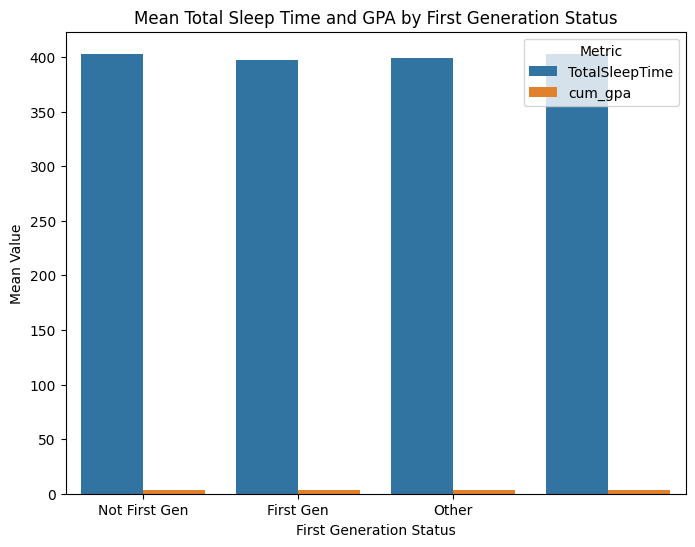

In [14]:
# prompt: create a plot of means from sleep_data

# Calculate the mean TotalSleepTime and cum_gpa for each group
mean_data = sleep_data_df.groupby('demo_firstgen')[['TotalSleepTime', 'cum_gpa']].mean().reset_index()

# Melt the DataFrame to long format for plotting
mean_melted = mean_data.melt(id_vars='demo_firstgen', var_name='Metric', value_name='MeanValue')

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(x='demo_firstgen', y='MeanValue', hue='Metric', data=mean_melted)
plt.title('Mean Total Sleep Time and GPA by First Generation Status')
plt.xlabel('First Generation Status')
plt.ylabel('Mean Value')
plt.xticks(ticks=[0, 1, 2], labels=['Not First Gen', 'First Gen', 'Other']) # Adjust labels as needed based on your data
plt.legend(title='Metric')
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.6 MB/s eta 0:00:00


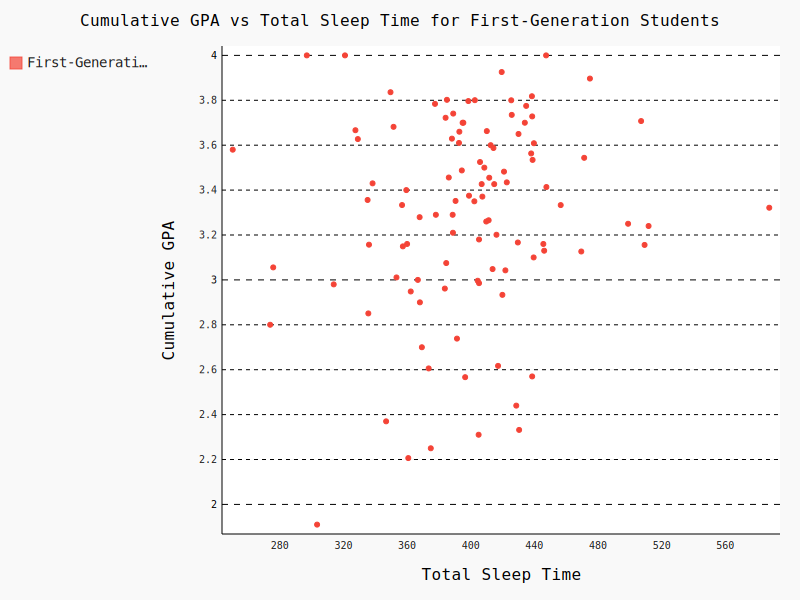

In [15]:
# prompt: create a plot of sleep_data_firstgen using pygal

!pip install pygal

import pygal

# Create a scatter plot
scatter_chart = pygal.XY(stroke=False)
scatter_chart.title = 'Cumulative GPA vs Total Sleep Time for First-Generation Students'
scatter_chart.x_title = 'Total Sleep Time'
scatter_chart.y_title = 'Cumulative GPA'

# Add the data to the scatter plot
# pygal expects a list of tuples for scatter plots: [(x1, y1), (x2, y2), ...]
scatter_data = [(row['TotalSleepTime'], row['cum_gpa']) for index, row in sleep_data_firstgen.iterrows()]
scatter_chart.add('First-Generation Students', scatter_data)

# Render the chart
# You can render to a file (SVG, PNG) or directly in the notebook (requires specific setup or rendering to HTML)
# To render in Colab, you can save as SVG and display it.
from IPython.display import SVG
scatter_chart.render_to_file('firstgen_sleep_gpa_scatter.svg')
SVG('firstgen_sleep_gpa_scatter.svg')